In [9]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
corr_ku = pd.read_csv("/Users/Jia/Downloads/data_skripsi/uji_data/merged_data_KU.csv")

In [11]:
corr_ku['time']= pd.to_datetime(corr_ku['time'])
corr_ku = corr_ku.drop(['time'], axis=1)
corr_ku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  180 non-null    int64  
 1   KABKOT      180 non-null    object 
 2   month       180 non-null    int64  
 3   year        180 non-null    int64  
 4   longitude   180 non-null    float64
 5   latitude    180 non-null    float64
 6   tb          180 non-null    int64  
 7   pm2p5       180 non-null    float64
 8   pm10        180 non-null    float64
 9   so2         180 non-null    float64
dtypes: float64(5), int64(4), object(1)
memory usage: 14.2+ KB


In [14]:
corr_ku = corr_ku.drop('Unnamed: 0', axis=1)
corr_ku

,KABKOT,month,year,longitude,latitude,tb,pm2p5,pm10,so2
0,JAKARTA BARAT,1,2020,106.750000,-6.158333,715,39.201529,56.164344,75.285376
1,JAKARTA BARAT,2,2020,106.750000,-6.158333,803,38.279912,55.080459,69.029097
2,JAKARTA BARAT,3,2020,106.750000,-6.158333,689,46.589306,66.366610,91.863513
3,JAKARTA BARAT,4,2020,106.750000,-6.158333,359,50.980975,72.526713,107.263388
4,JAKARTA BARAT,5,2020,106.750000,-6.158333,276,55.668935,79.210487,120.655917
...,...,...,...,...,...,...,...,...,...
175,JAKARTA UTARA,8,2022,106.891667,-6.125000,636,60.172357,85.524501,104.867688
176,JAKARTA UTARA,9,2022,106.891667,-6.125000,712,61.185956,87.035939,100.019642
177,JAKARTA UTARA,10,2022,106.891667,-6.125000,715,49.726068,70.626910,92.417571
178,JAKARTA UTARA,11,2022,106.891667,-6.125000,685,46.806576,66.740500,89.921922


In [19]:
# List of unique KABKOT values
kabkot_values = corr_ku['KABKOT'].unique()

# Create an empty list to store DataFrames for each city
city_dataframes = []

# Iterate over KABKOT values
for kabkot in kabkot_values:
    # Filter data for the current city
    city_df = corr_ku[corr_ku['KABKOT'] == kabkot]
    
    # Iterate over months and years
    for year in city_df['year'].unique():
        for month in range(1, 13):
            # Filter data for the current month and year
            month_year_df = city_df[(city_df['year'] == year) & (city_df['month'] == month)]
            
            # Append the filtered data to the city DataFrame
            city_dataframes.append(month_year_df)

# Concatenate all DataFrames in the list into a single DataFrame
final_df = pd.concat(city_dataframes, ignore_index=True)
final_df

,KABKOT,month,year,longitude,latitude,tb,pm2p5,pm10,so2
0,JAKARTA BARAT,1,2020,106.750000,-6.158333,715,39.201529,56.164344,75.285376
1,JAKARTA BARAT,2,2020,106.750000,-6.158333,803,38.279912,55.080459,69.029097
2,JAKARTA BARAT,3,2020,106.750000,-6.158333,689,46.589306,66.366610,91.863513
3,JAKARTA BARAT,4,2020,106.750000,-6.158333,359,50.980975,72.526713,107.263388
4,JAKARTA BARAT,5,2020,106.750000,-6.158333,276,55.668935,79.210487,120.655917
...,...,...,...,...,...,...,...,...,...
175,JAKARTA UTARA,8,2022,106.891667,-6.125000,636,60.172357,85.524501,104.867688
176,JAKARTA UTARA,9,2022,106.891667,-6.125000,712,61.185956,87.035939,100.019642
177,JAKARTA UTARA,10,2022,106.891667,-6.125000,715,49.726068,70.626910,92.417571
178,JAKARTA UTARA,11,2022,106.891667,-6.125000,685,46.806576,66.740500,89.921922


In [21]:
# filter based on KABKOT
city_east = corr_ku[corr_ku['KABKOT'] == 'JAKARTA TIMUR']
city_south = corr_ku[corr_ku['KABKOT'] == 'JAKARTA SELATAN']
city_west = corr_ku[corr_ku['KABKOT'] == 'JAKARTA BARAT']
city_north = corr_ku[corr_ku['KABKOT'] == 'JAKARTA UTARA']
city_central = corr_ku[corr_ku['KABKOT'] == 'JAKARTA PUSAT']

# extracts column names starting from the 7th column (index 6) onward
i_east = (city_east.columns[6:])
i_south = (city_south.columns[6:])
i_west = (city_west.columns[6:])
i_north = (city_north.columns[6:])
i_central = (city_central.columns[6:])
print(i_east,i_south,i_west,i_north,i_central)

Index(['pm2p5', 'pm10', 'so2'], dtype='object') Index(['pm2p5', 'pm10', 'so2'], dtype='object') Index(['pm2p5', 'pm10', 'so2'], dtype='object') Index(['pm2p5', 'pm10', 'so2'], dtype='object') Index(['pm2p5', 'pm10', 'so2'], dtype='object')


In [22]:
#filter corr_ku based on year
ku_2020 = corr_ku[corr_ku['year'] == 2020]
ku_2021 = corr_ku[corr_ku['year'] == 2021]
ku_2022 = corr_ku[corr_ku['year'] == 2022]

# extract column names starting from the 7th column (index 6) onward
i_2020 = (ku_2020.columns[6:])
i_2021 = (ku_2021.columns[6:])
i_2022 = (ku_2022.columns[6:])
print(i_2020,i_2021,i_2022)

Index(['pm2p5', 'pm10', 'so2'], dtype='object') Index(['pm2p5', 'pm10', 'so2'], dtype='object') Index(['pm2p5', 'pm10', 'so2'], dtype='object')


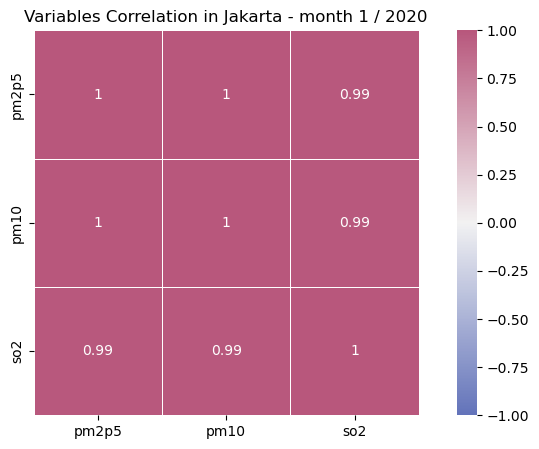

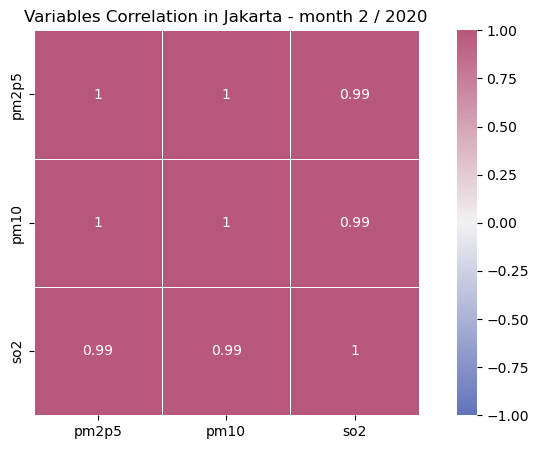

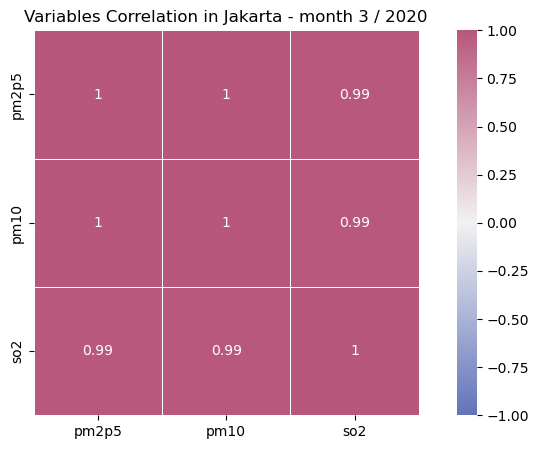

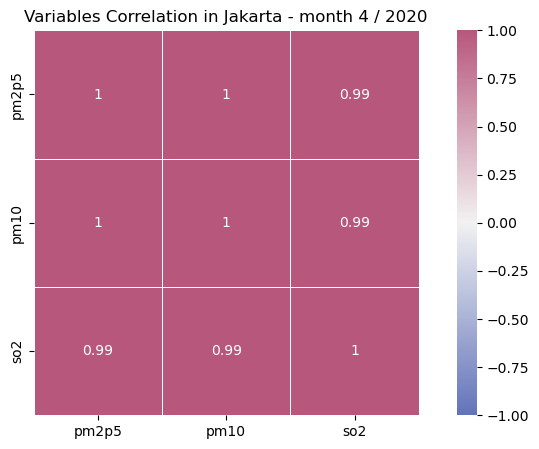

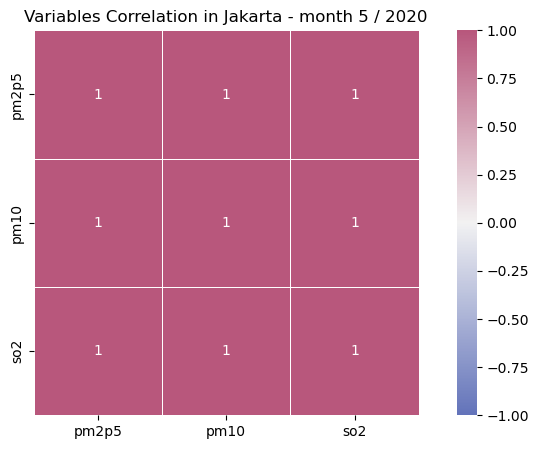

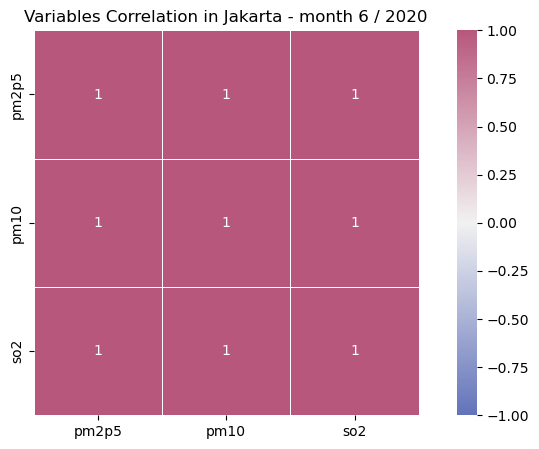

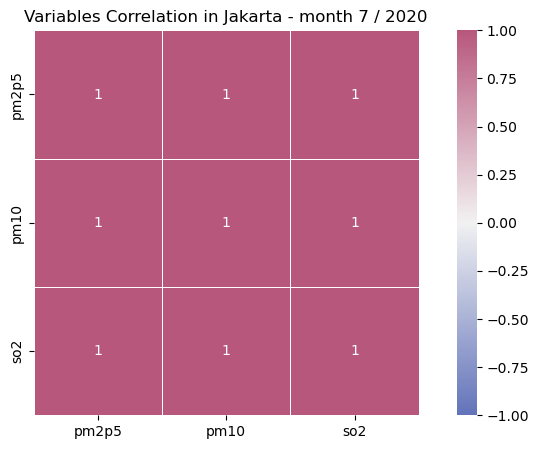

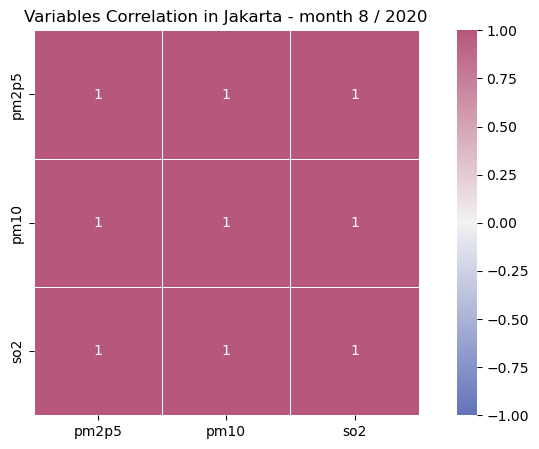

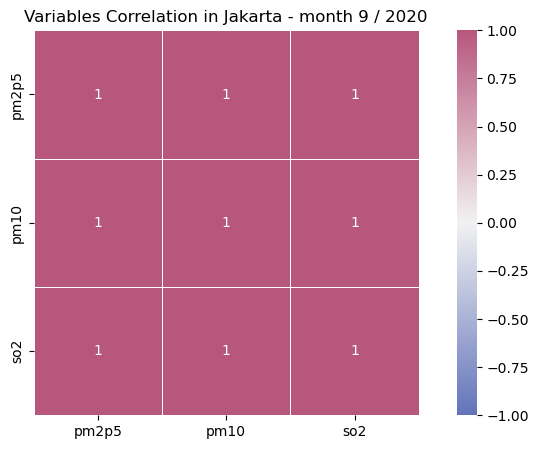

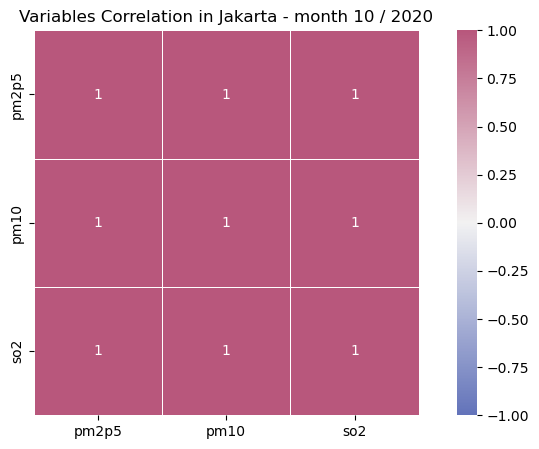

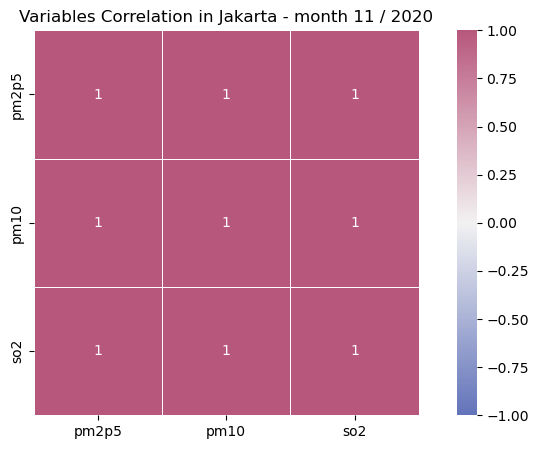

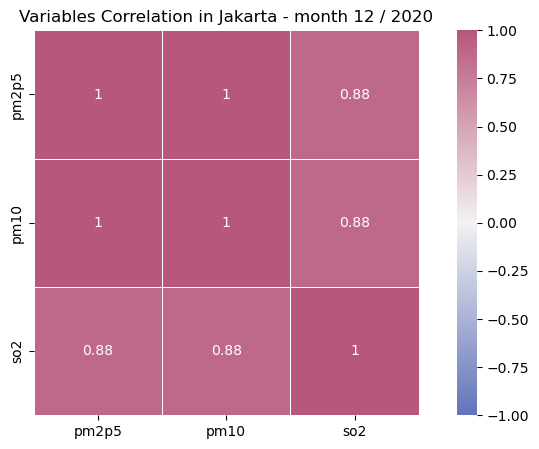

In [25]:
# Iterate over months
for month in range(1, 13):
    # Filter data for the current month
    month_df = ku_2020[ku_2020['month'] == month]
    
    # Extract columns starting from the 7th column (index 6) onward
    columns_to_extract = month_df.columns[6:]
    
    # Create a correlation matrix for the current month
    corr_matrix = month_df[columns_to_extract].corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 5))
    plt.title(f"Variables Correlation in Jakarta - month {month} / 2020")
    cmap = sns.diverging_palette(260, -10, s=50, l=50, n=6, as_cmap=True)
    sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, cmap=cmap, vmin=-1, vmax=1)
    plt.show()

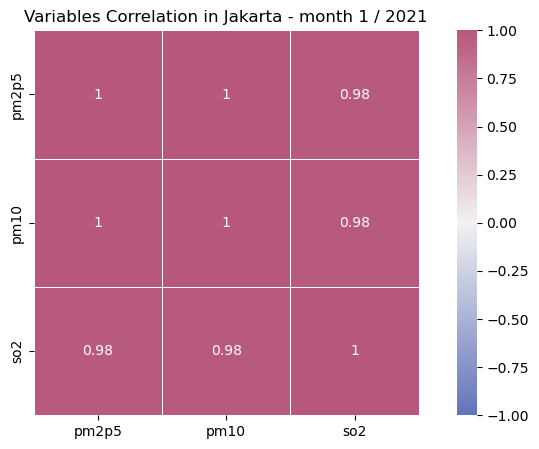

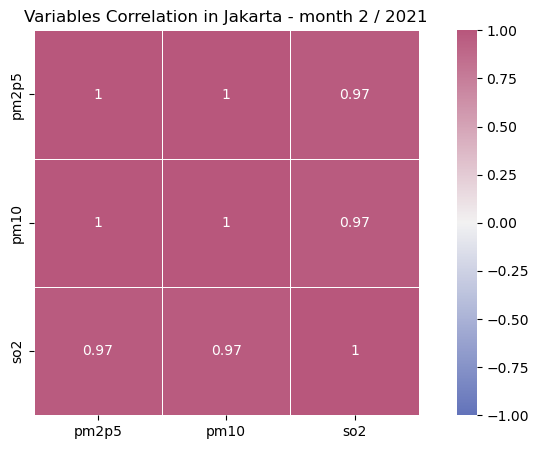

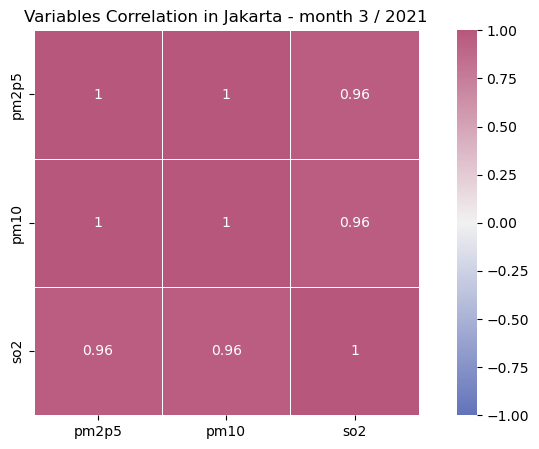

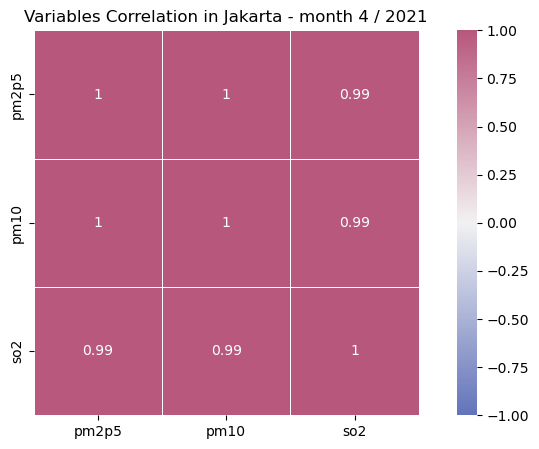

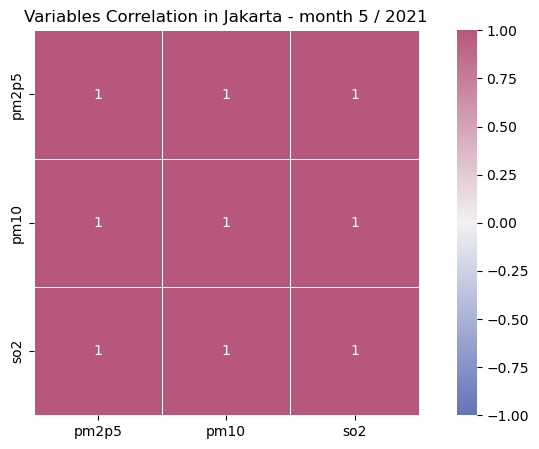

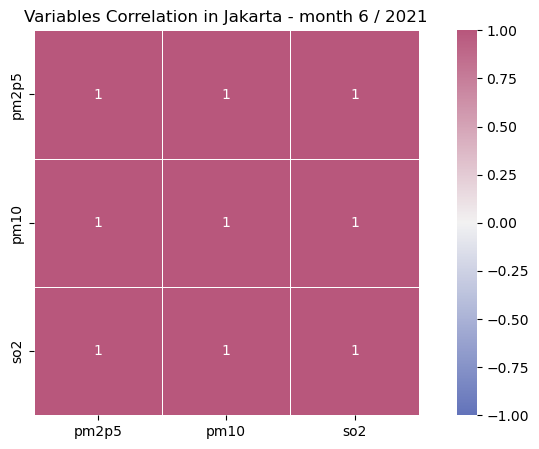

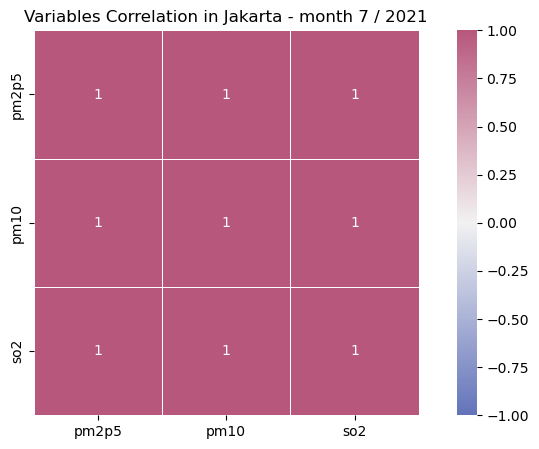

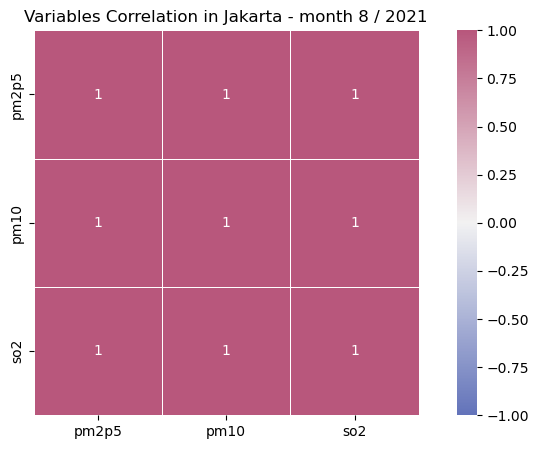

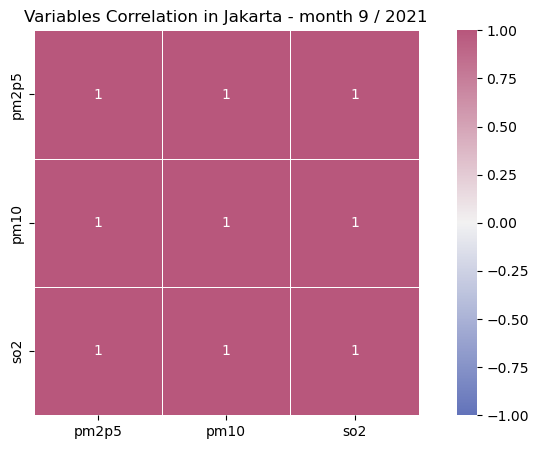

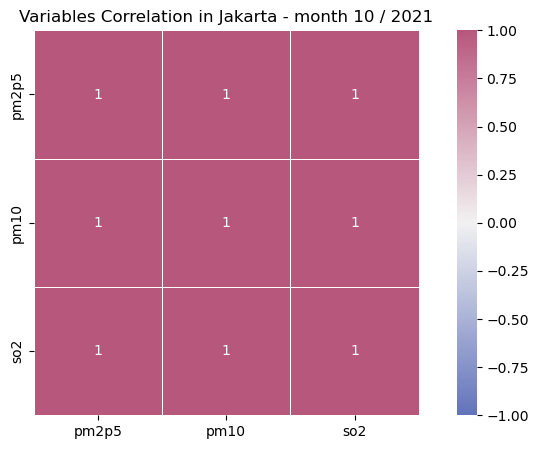

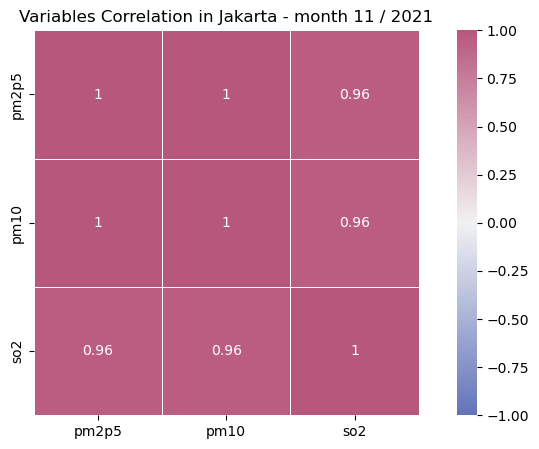

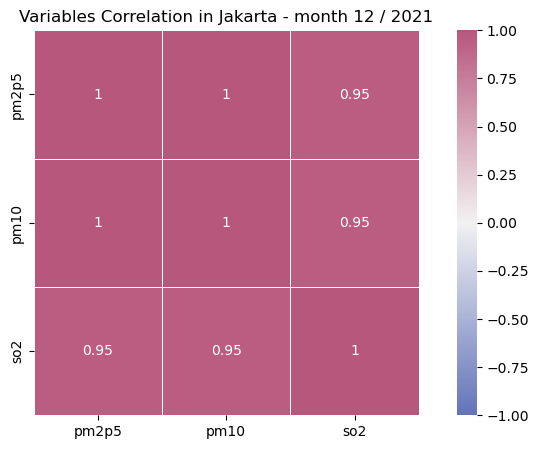

In [24]:
# Iterate over months
for month in range(1, 13):
    # Filter data for the current month
    month_df = ku_2021[ku_2021['month'] == month]
    
    # Extract columns starting from the 7th column (index 6) onward
    columns_to_extract = month_df.columns[6:]
    
    # Create a correlation matrix for the current month
    corr_matrix = month_df[columns_to_extract].corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 5))
    plt.title(f"Variables Correlation in Jakarta - month {month} / 2021")
    cmap = sns.diverging_palette(260, -10, s=50, l=50, n=6, as_cmap=True)
    sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, cmap=cmap, vmin=-1, vmax=1)
    plt.show()

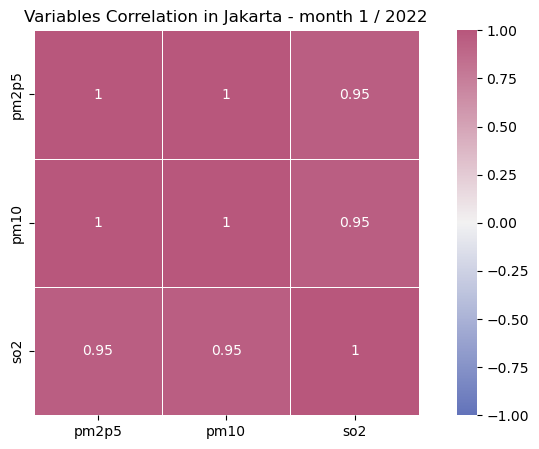

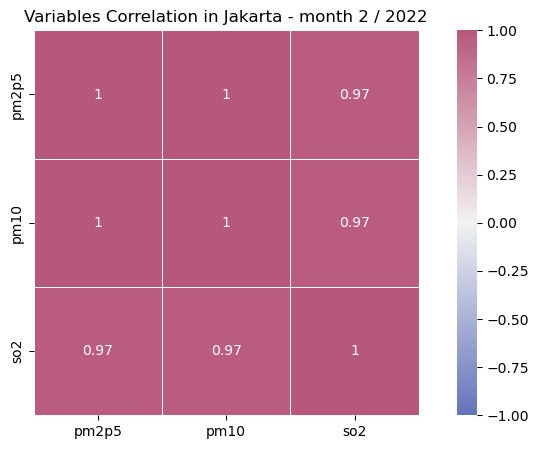

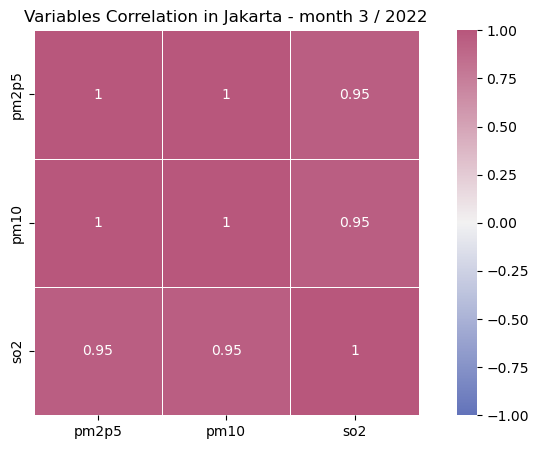

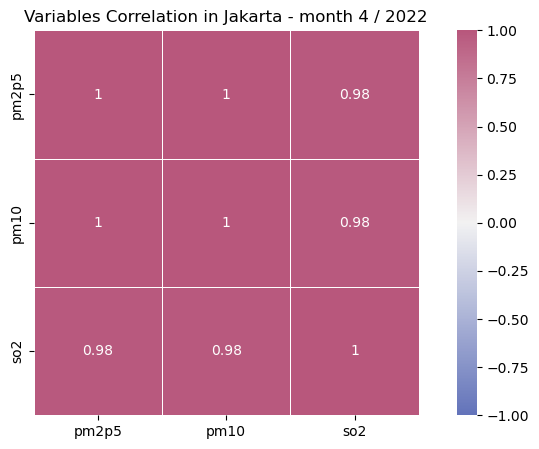

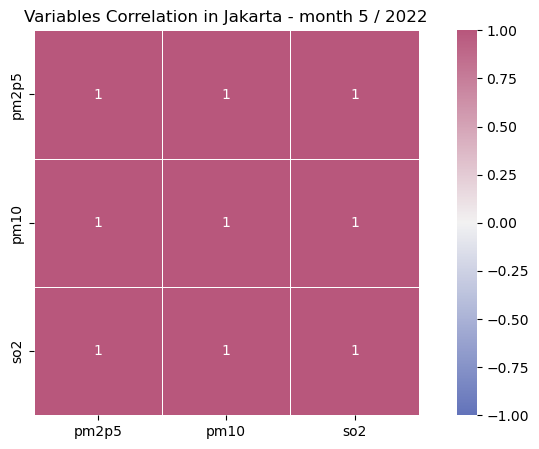

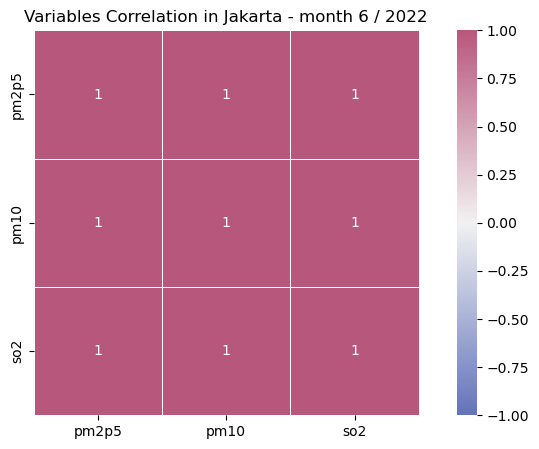

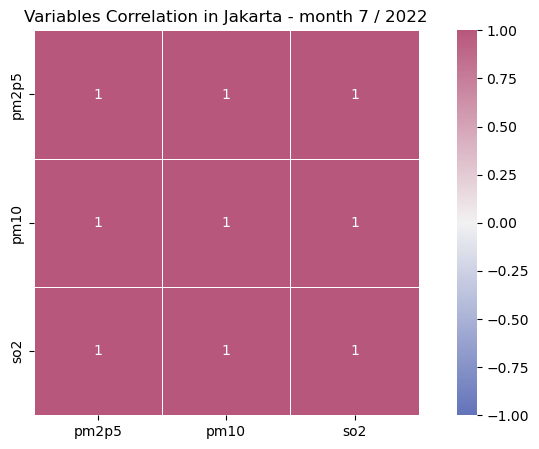

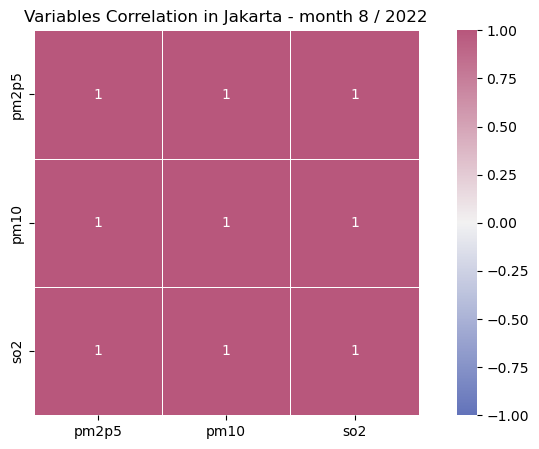

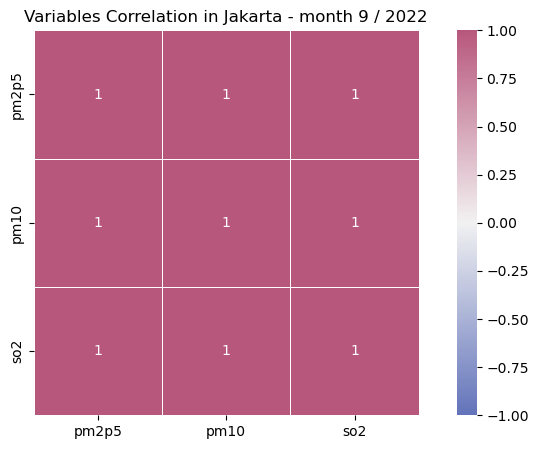

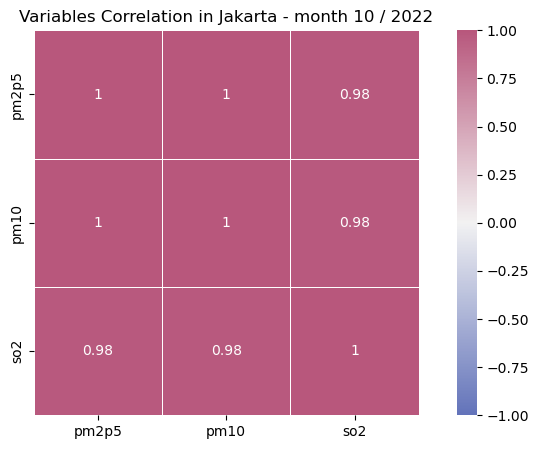

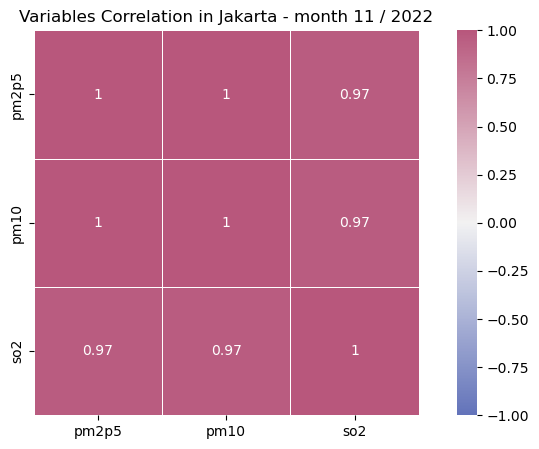

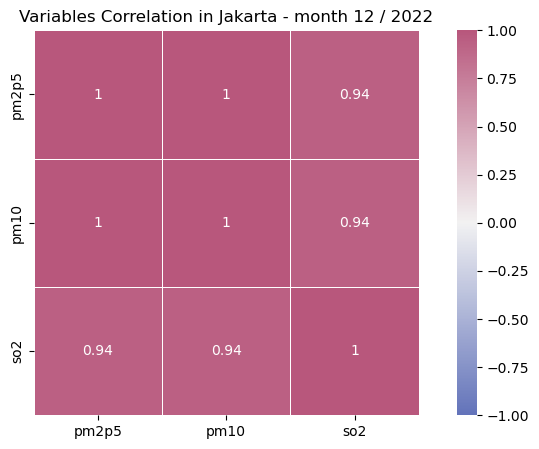

In [26]:
# Iterate over months
for month in range(1, 13):
    # Filter data for the current month
    month_df = ku_2022 [ku_2022['month'] == month]
    
    # Extract columns starting from the 7th column (index 6) onward
    columns_to_extract = month_df.columns[6:]
    
    # Create a correlation matrix for the current month
    corr_matrix = month_df[columns_to_extract].corr()
    
    # Plot the correlation heatmap
    plt.figure(figsize=(10, 5))
    plt.title(f"Variables Correlation in Jakarta - month {month} / 2022")
    cmap = sns.diverging_palette(260, -10, s=50, l=50, n=6, as_cmap=True)
    sns.heatmap(corr_matrix, square=True, annot=True, linewidths=.5, cmap=cmap, vmin=-1, vmax=1)
    plt.show()